<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Air Quality forecasting(CO2 emissions)  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          To forecast Co2 levels for an organization so that the organization can follow government norms
with respect to Co2 emission levels.
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [1]:
#Importing libraries
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [2]:
#Import the data
data = pd.read_excel('CO2 dataset.xlsx')
data                   # will show 1st 5 rows only

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [3]:
data.shape  # will show rows and columns

(215, 2)

In [4]:
data.isnull().sum()          # This functin will show the total null values in our data

Year    0
CO2     0
dtype: int64

In [5]:
data.info()             # this function will show the all information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [6]:
data.describe()          # This function will describe the data

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [7]:
data[data.duplicated()]              # No duplicated data present in ur dataset

,Year,CO2


In [8]:
data['Year'] = data['Year'].astype(int)      #convert the year column from float to int
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


<h2 style="color:#DC7633;">Visualization </h2>


In [9]:
data.index = data['Year']
data.drop(columns='Year',inplace=True)
data.head()


,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542


<h2 style="color:#DC7633;">Density Plot</h2>


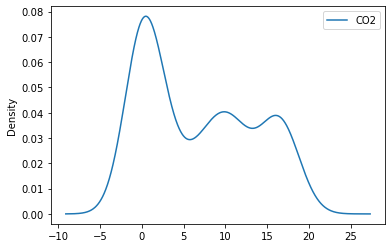

In [10]:
data.plot(kind='kde')
pyplot.show()

<h2 style="color:#DC7633;">Histogram</h2>


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

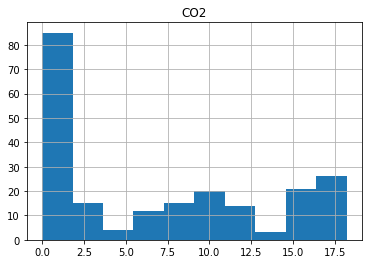

In [11]:
data.hist()

<h2 style="color:#DC7633;">Line plot</h2>


<AxesSubplot:xlabel='Year'>

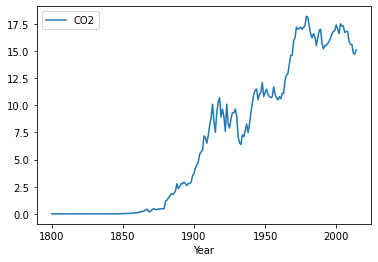

In [12]:
data.plot()

<h2 style="color:#DC7633;">Lag Plot</h2>


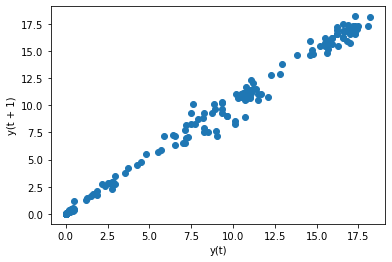

In [13]:
from pandas.plotting import lag_plot

lag_plot(data)
pyplot.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) After the total observation we can see the trend of our data and we have higher rate between -5 to +5<br><br>
          2) There is trend in ur data because after some perid its going high suddenly and its moving up direction<br><br>
           3) The Data is linear we can see using log plot
        </p>
    </div>

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive", period=1)


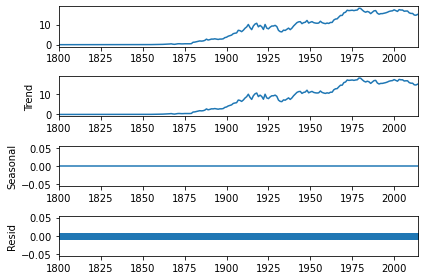

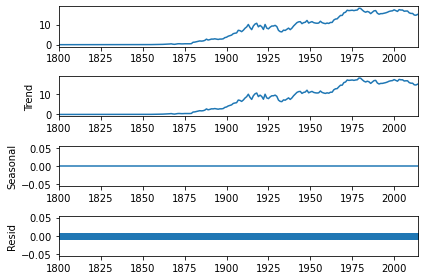

In [15]:
decompose_data.plot()

<AxesSubplot:xlabel='Year'>

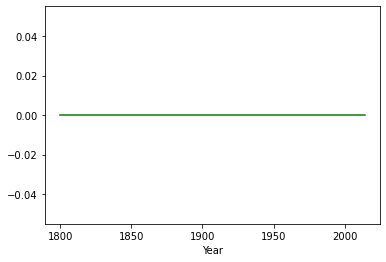

In [16]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

<h2 style="color:#DC7633;">ACF Plot</h2>


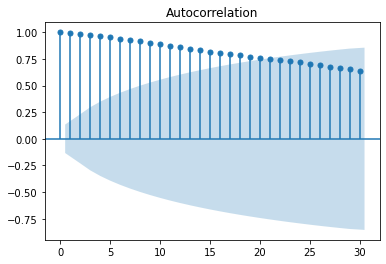

In [17]:
#To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data,lags=30)

pyplot.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         Here the blue area is the confidence interval<br><br>
            The candles started coming inside after the 20th candle. <br><br>
            This can be due to the seasonality of 20-30 years.
        </p>
    </div>


In [18]:
import matplotlib.pyplot as plt
%matplotlib  inline
from pandas import read_csv


<h2 style="color:#DC7633;">Testing the data set by dicky-fuller method: </h2>


In [19]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.CO2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.3784627751558866
2. P-Value :  0.9136330950336238
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 214
5. Critical Values :
	 1% :  -3.4612821203214907
	 5% :  -2.875142613826617
	 10% :  -2.574020122281422


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         Here in the output, we can see that the p-value of the data set is more than 0.05.<br> 
            Because of this reason only,  we can interpret the data as non-stationary
        </p>
    </div>


<h2 style="color:#DC7633;">log-transformed time-series </h2>


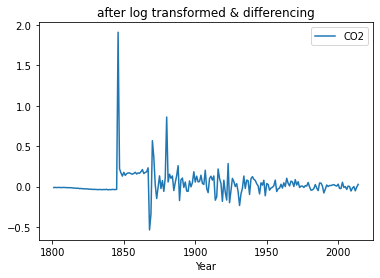

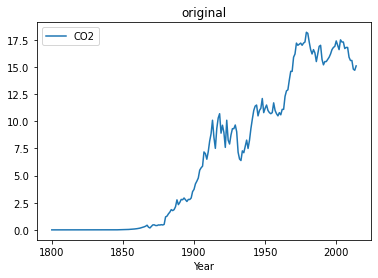

In [20]:
import numpy as np
log_data = pd.DataFrame(data.CO2.apply(lambda x : np.log(x)))
log_diff = log_data - log_data.shift()
#ax1 = plt.subplot()
log_diff.plot(title='after log transformed & differencing');
ax2 = plt.subplot()
data.plot(title='original'); 

In [21]:
test = adfuller(log_diff.dropna().CO2)
print("p-value :", test[1]) 

p-value : 1.2565875448384037e-23


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1) We try to normalize the seasonality value by the difference of log to CO2 count and shifted 
    the log value of CO2 count to one step.  <br><br>
    2) we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider over data is stationary.
        </p>
    </div>
    